In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# from mpl_toolkits.mplot3d import Axes3D
import warnings #This is just to suppress any error warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

def rungeKutta4(operator, initCond, initTime, finalTime, nSteps):
    ''' Solves an ODE of type dy(t)/dt = f(t,y(t))'''
    dt = (finalTime - initTime)/nSteps
    times = np.linspace(initTime, finalTime, nSteps+1)
    solut = [initCond]
    for t in times[:-1]:
        k1 = operator(t, solut[-1])
        k2 = operator(t + dt/2, solut[-1] + dt * k1/2 )
        k3 = operator(t + dt/2, solut[-1] + dt * k2/2 )
        k4 = operator(t + dt, solut[-1] + dt * k3)
        solut.append(solut[-1] + dt * (k1 + 2*k2 + 2*k3 + k4)/6 )
    return times, np.array(solut)

### <u> Modelling Epidemic Spreading (Deterministic Model) </u>
There are various methods to model epidemic spreading. In this chapter, we begin with the deterministic model, which gives a fixed outcome for different input parameters. <br><br>

#### <u> 1. Ordinary Differential Equations (ODE) </u>
The ODE method is a deterministic approach to show the changing dynamics of individuals in the Susceptible ($S$), Infected ($I$) and Recovered ($R$) population over time. In the model we make two important assumptions:
1. No vital dynamics. This means that the total population is closed: $N$ = $S(t) + I(t) + R(t)$, with no birth or deaths at any point in time. 
2. At all times, the $S$ and $I$ population mix homogeneously. This means that both $S$ and $I$ individuals are distributed evenly at all times and thus, each $S$ individual will encounter the same amount of interaction with an $I$ individual. 

With that, we can write the set of ODEs describing the deterministic model as follows:

\begin{align}
    \frac{dS (t)}{dt} = -\frac {\beta S I}{N} -- (1) \\ 
    \frac{dI (t)}{dt} = \frac {\beta S I}{N} - \gamma I -- (2) \\
    \frac{dR (t)}{dt} = \gamma I -- (3) \\
\end{align}

There are two parameters in the model that are used to characterise the transitions between different compartments. As a start, we assume these to be constant with time: <br>
1. $\beta$ is known as the effective contact rate and is defined as the product of the average rate of contact between susceptible-infected individuals and the probability of infection given a contact between susceptible-infected individuals. Intuitively, this can be thought of as the number of infectious contact by an infected individual per time. <br>
2. $\gamma$ is known as the recovery rate and is defined by the inverse of the average time of recovery (or average duration of infectiousness). <br>

<b> *Cite (Notes On r0-Jones, SIR model and foundations of public health-MATerials MATemàtics, The SIR Model for Spread of Disease - David smith & Lang Moore)* </b>

With the parameters defined, we can understand why the ODEs were constructed in the manner above.

For equation (1) the product of $\beta$ and $I$ gives the total number of infection producing contacts per unit time, and thus, the entirety $\frac {\beta S I}{N}$ tells us the number of susceptible individuals who will transit from the $S$ to $I$ population per time. Therefore, $\frac {dS (t)}{dt}$ is the negative of $\frac {\beta S I}{N}$ showing the decrease in susceptible individuals over time. <br>

Apart from the $\frac {\beta S I}{N}$ infected individuals who will be added to the infected pool as in equation (2), there will be those who have recovered and removed from the infected population. This is characterized by the product of $\gamma$ and $I$ which gives the average number of infected individuals who recover per unit time. Hence, $\frac {dI (t)}{dt}$ gives the equation $\frac {\beta S I}{N}$ - $\gamma I$.

For those recovered, they will be added to the recovered population, giving $\frac {dR (t)}{dt}$ equals to $\gamma I$ as shown in equation (3).

Since the system of ODEs are non-linear, we cannot solve them analytically. However, we can employ the Runge-Kutta (4th order) numerical methods to solve the equations. An example of the ODE model is shown below, with:
- $N$ = 500, $S_0$ = 499, $I_0$ = 1 and $R_0$ = 0
- $t_0$ = 0 and $t_f$ = 20
- $\beta$ = 4
- $\gamma$ = 1/3 

In [2]:
#Testing out the SIR Model without vital dynamics
def SIR_model(initialTime, finalTime, beta, gamma, S_0, I_0, R_0, nSteps = 2000): 
    time_steps = np.linspace(initialTime, finalTime, nSteps)
    operator = lambda t, P: np.array([(-beta*P[0]*P[1]/N), \
                                 ((beta*P[0]*P[1]/N) - gamma*P[1]),\
                                  (gamma*P[1])])
    t, solut = rungeKutta4(operator, np.array([S_0, I_0, R_0]), initialTime, finalTime, nSteps)
    return(t, solut)
    
# Input initial conditions for initialTime and finalTime
initialTime, finalTime = 0, 20

#Fixed beta and gamma
beta = 4
gamma = 1/3

#Input initial conditions for S_0, I_0 and R_0
S_0 = 499
I_0 = 1
R_0 = 0
N = S_0 + I_0 + R_0

t, SIR_numbers = SIR_model(initialTime, finalTime, beta, gamma, S_0, I_0, R_0)

#Some checks:
# print(np.round(np.sum(SIR_numbers[-1]))) #check to ensure that N_final = N

0 1 499


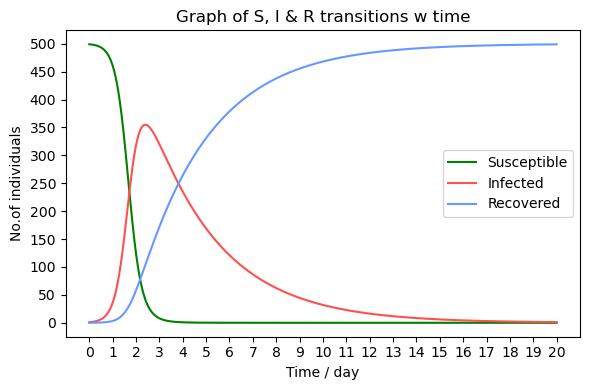

In [15]:
#Plotting the SIR graphs against time
final_SIR = np.rint(SIR_numbers[-1])
S_f, I_f, R_f = int(final_SIR[0]), int(final_SIR[1]), int(final_SIR[2]) #there may be some rounding issue
print(S_f,I_f, R_f) #to find the approximate number of individuals at each compartment at t_final

S, I, R = SIR_numbers[:,0], SIR_numbers[:,1], SIR_numbers[:,2]
# print(S)
# print(I)
# print(R)

plt.figure(figsize=(6,4))
plt.plot(t, S, label  = "Susceptible", color = 'g')
plt.plot(t, I, label  = "Infected", color = '#ff5050')
plt.plot(t, R, label  = "Recovered", color = '#6699ff')
plt.xticks(np.arange(initialTime, finalTime + 1))
plt.yticks(np.arange(0, N + 1, 50))
plt.title("Graph of S, I & R transitions w time")
plt.xlabel("Time / day")
plt.ylabel("No.of individuals")
plt.legend()
plt.tight_layout()
plt.savefig('SIR plot intro.png', dpi=300, bbox_inches='tight')
plt.show()

####  <u> 2. Basic Reproduction Number $r_0$ </u>
The basic reproduction number $r_0$ is a quantity to measure the transmission potential of a disease and is defined as the expected number of secondary infections produced by an index case in a completely susceptible population.

<b>*(Cite: Epidemic theory - FPH UK and, Further Notes on the Basic Reproduction Number)*</b>

In the deterministic ODE model, $r_0$ can be expressed as:
\begin{align}
    \ r_0 = \frac {\beta}{\gamma} \\
\end{align}

<b>*(Cite: Evaluating different epidemiological models with the identical basic reproduction number $ℛ_0$ - Fan Bai and, Unraveling R0: Considerations for Public Health Applications)*</b>

The value of $r_0$ governs whether an epidemic will spread in a population at the initial stage, $t_0$. For $r_0$ > 1, the epidemic will start spreading and the number of infected individuals will increase at the next time step, $t_1$. On the other hand, for $r_0$ < 1, the epidemic slowly dies down and the number infected individuals will decrease at $t_1$. Intuitively this can be understood as if $r_0$ > 1, the transmission rate $\beta$ is larger than the recovery rate $\gamma$ and thus, more individuals will get infected than recovered in the population. The inverse can also be observed for $r_0$ < 1. <br>

We can verify this mathematically by analyzing equation (2). For the epidemic to outbreak:

\begin{align}
    \frac{dI_0}{dt} > 0 \\
\end{align}

This can be re-expressed as:
\begin{align}
    \frac{dI_0}{dt} = \gamma I_0 (\frac {r_0 S_0}{N} - 1) > 0 \\
\end{align}

As $\gamma$ and $I_0$ are > 0, it compels:

\begin{align}
    \frac{r_0 S_0}{N} - 1 > 0 \\
    \ r_0 > \frac{N}{S_0} \\
\end{align}

Finally, since $N$ > $S_0$, $r_0$ > 1, corroborating with the idea above.

An example is given below: On the right, we have ($\beta$, $\gamma$) = (4, 1/3) and on the left, ($\beta$, $\gamma$) = (1/3, 4). This makes $r_0$ (right) to be 12 whereas $r_0$ (left) 1/12. The dynamics of the SIR transitions are plotted with $S_0$ = 400 and $I_0$ = 100

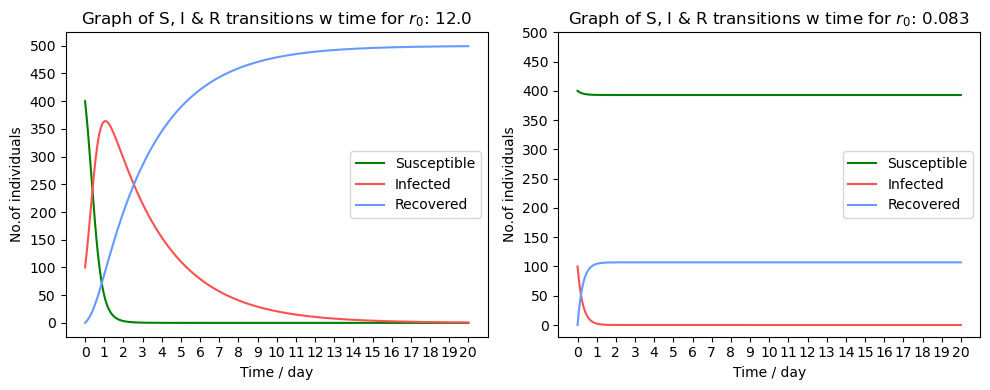

In [16]:
# Input initial conditions for initialTime and finalTime
initialTime, finalTime = 0, 20

#Beta & Gamma for different plots
beta_right = 4
gamma_right = 1/3

beta_left = 1/3
gamma_left = 4

#Input initial conditions for S_0, I_0 and R_0
S_0 = 400
I_0 = 100
R_0 = 0
N = S_0 + I_0 + R_0

t_right, SIR_numbers_right = SIR_model(initialTime, finalTime, beta_right, gamma_right, S_0, I_0, R_0)
t_left, SIR_numbers_left = SIR_model(initialTime, finalTime, beta_left, gamma_left, S_0, I_0, R_0)

S_right, I_right, R_right = SIR_numbers_right[:,0], SIR_numbers_right[:,1], SIR_numbers_right[:,2]
S_left, I_left, R_left = SIR_numbers_left[:,0], SIR_numbers_left[:,1], SIR_numbers_left[:,2]

fig, axs = plt.subplots(1,2, figsize = (10,4))

axs[0].plot(t_right, S_right, label  = "Susceptible", color = 'g')
axs[0].plot(t_right, I_right, label  = "Infected", color = '#ff5050')
axs[0].plot(t_right, R_right, label  = "Recovered", color = '#6699ff')
SIR_plot_right_title = "Graph of S, I & R transitions w time for $r_0$: " + str(beta_right/gamma_right)
axs[0].set_title(SIR_plot_right_title)
axs[0].set_xlabel("Time / day")
axs[0].set_ylabel("No.of individuals")
axs[0].set_xticks(np.arange(initialTime, finalTime + 1))
axs[0].set_yticks(np.arange(0, 501, 50))
axs[0].legend()

axs[1].plot(t_left, S_left, label  = "Susceptible", color = 'g')
axs[1].plot(t_left, I_left, label  = "Infected", color = '#ff5050')
axs[1].plot(t_left, R_left, label  = "Recovered", color = '#6699ff')
SIR_plot_left_title = "Graph of S, I & R transitions w time for $r_0$: " + str(round(beta_left/gamma_left,3))
axs[1].set_title(SIR_plot_left_title)
axs[1].set_xlabel("Time / day")
axs[1].set_ylabel("No.of individuals")
axs[1].set_xticks(np.arange(initialTime, finalTime + 1))
axs[1].set_yticks(np.arange(0, 501, 50))
axs[1].legend()

plt.tight_layout()

plt.savefig('Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#### <u> 3. Phase portraits corresponding to different initial conditions </u>
Phase portraits give a geometric representation of the trajectories of a dynamical system. By setting different initial inputs $S_0$ and $I_0$, we will get different curves or point as outcomes. In this segment, we aim to plot the dynamics of the susceptible and infectious population when we change the initial conditions. We shall do this for different $r_0$ values for comparison as well. In its entirety, we hope to get insights on the dynamics at the end of the epidemic, namely $S_\infty$ and $I_\infty$.

#### <u> 3.1 Plots of phase portraits </u>
To plot the phase portraits, we first choose a set of $S_0$ and $I_0$ values, keeping in mind the relation $N = S_0 + I_0$ (assuming $R_0$ = 0). For $r_0$, we choose the values 2, 4 and 6, and fix $\gamma$ = 1/2 while changing $\beta$ to 1, 2 and 3 respectively for the different plots.

We then input these into our Runge-Kutta4 solver and plot $I$ against $S$. The results are shown below:

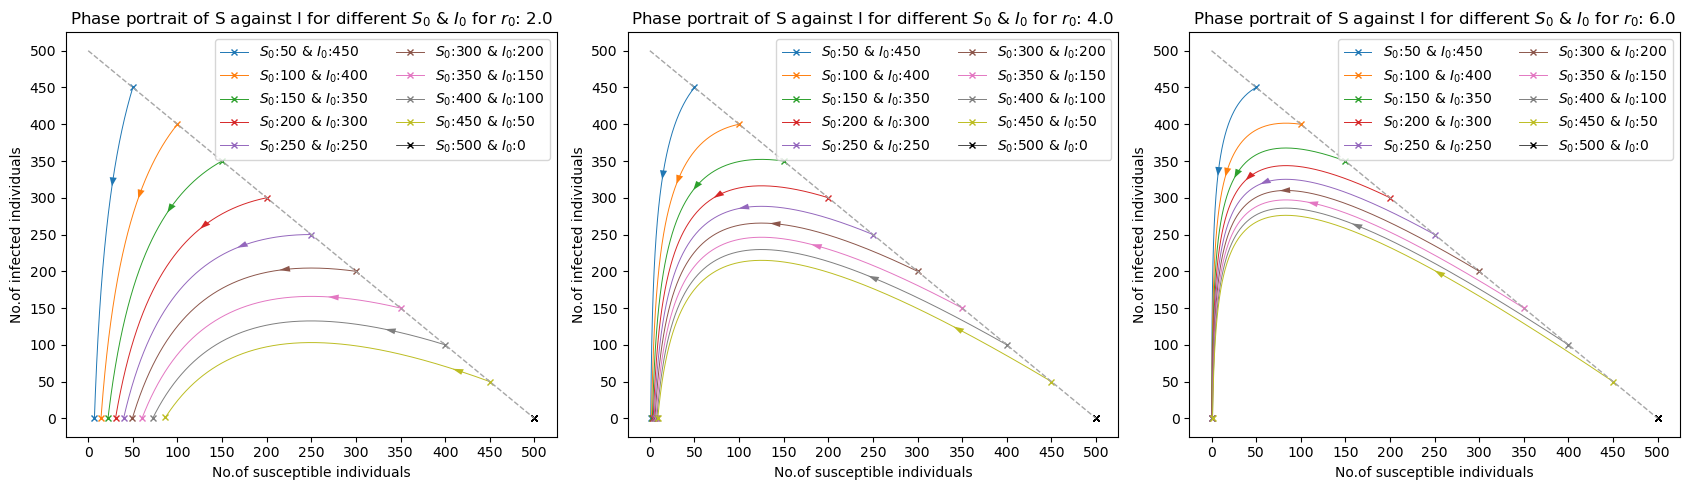

In [17]:
# Color of plots
color_palette = list(mcolors.TABLEAU_COLORS.values()) #10 diff colors

# Input initial conditions for initialTime and finalTime
initialTime, finalTime = 0, 20

#Fixed beta and gamma to get r_0 = 4
beta = [1, 2, 3]
gamma = 1/2 

N = 500
S_0_set = np.arange(50, 501, 50)
I_0_set = N - S_0_set #So that all S_0 + I_0 = N

fig, axs = plt.subplots(1,3, figsize = (17,5))

for i in range(len(beta)):
    for j in range(len(S_0_set) - 1):
        t_set, SIR_numbers_set = SIR_model(initialTime, finalTime, beta[i], gamma, S_0_set[j], I_0_set[j], 0)
        S_set, I_set, R_set = SIR_numbers_set[:,0], SIR_numbers_set[:,1], SIR_numbers_set[:,2]
        S_I_0_label = "$S_0$:" + str(S_0_set[j]) + " & $I_0$:" + str(I_0_set[j])
        axs[i].plot(S_set, I_set, label = S_I_0_label, linewidth = 0.7, marker = 'x', \
                    markersize = 4, markevery=[0,-1], color = color_palette[j])
        axs[i].arrow(S_set[80], I_set[80], S_set[83] - S_set[80], I_set[83] - I_set[80], shape='full', lw = 0, \
                     length_includes_head = True, head_width = 8, color = color_palette[j])
        

    t_set_last, SIR_numbers_set_last = SIR_model(initialTime, finalTime, beta[i], gamma, S_0_set[-1], I_0_set[-1], 0)
    S_set_last, I_set_last, R_set_last = SIR_numbers_set_last[:,0], SIR_numbers_set_last[:,1], SIR_numbers_set_last[:,2]
    S_I_0_label_last = "$S_0$:" + str(S_0_set[-1]) + " & $I_0$:" + str(I_0_set[-1])
    axs[i].plot(S_set_last, I_set_last, label = S_I_0_label_last, marker = "x", markersize = 4, linewidth = 0.5, color = 'k') 
    axs[i].plot([0, N], [N, 0], linestyle = 'dashed', linewidth = 1, color = '#a6a6a6')


    graph_title = "Phase portrait of S against I for different $S_0$ & $I_0$ for $r_0$: " + str(beta[i]/gamma)
    axs[i].set_title(graph_title)
    axs[i].set_xlabel("No.of susceptible individuals")
    axs[i].set_ylabel("No.of infected individuals")
    axs[i].set_xticks(np.linspace(0, N, 11))
    axs[i].set_yticks(np.linspace(0, N, 11))
    axs[i].legend(ncol = 2)
    

plt.tight_layout()
plt.show()

#### <u> 3.1.1 Results & Observations </u>
From the results above, there are three main observations we can make. 
1. At $S_0$ = 500 ($N$), the plot remains as a point unlike other $S_0$ which are curves pointing towards 0. This is understandable since $I_0$ = 0, implying no infected individuals at the start and hence, no susceptible individuals will turn infected.

2. At $t_\infty$, $I_\infty$ tends to 0 for all initial conditions $S_0$ and $I_0$. This corroborates with our intuition that for an epidemic to end, there can be no infected individuals at $t_\infty$. 

3. As $r_0$ increases, $S_\infty$ will tend to 0 regardless of the initial condition $S_0$ & $I_0$. This can be explained by understanding that a higher $r_0$ value will suggests a larger outbreak and thus, more susceptible individuals will get infected. Hence, most of the susceptible individuals will catch the virus resulting in a value close to 0 at $t_\infty$. In this case,it seems that $r_0$ = 6 is the approximate value to converge all $S_\infty$ to 0.

#### <u> 3.2 Mathematical explanation of observations in 3.1 </u> 

The phase portrait and results found in 3.1.1 could be explained mathematically if we analyse equations (1) and (2). To do so, we first rewrite (1) and (2) into $dI/dS$ by taking (2)/(1). The results gives the following:
\begin{align}
    \frac{dI}{dS} = -1 + \frac {N\gamma}{S\beta} -- (4) \\ 
\end{align}

We integrate $\frac{dI}{dS}$ over the initial conditions $S_0$ and $I_0$, and substitute $\beta$/$\gamma$ with $r_0$ to obtain:

\begin{align}
    \int_{I_0}^I dI = \int_{S_0}^S -1 + \frac {N}{r_0 S} \;dS\\ 
    I - I_0 = [-S + \frac{N}{r_0} ln(S)]_{S_0}^S \\
    I = I_0 - S + \frac{N}{r_0} ln(S) + S_0 - \frac{N}{r_0} ln(S_0) \\
    I = N - S + \frac{N}{r_0} ln(\frac{S}{S_0}) -- \;(5) \\
\end{align}

With equation (5), we plot $I$ against $S$ using the same set of $r_0$ and $S_0$ parameters as in 3.1. Note that for the values of $S$, we only enumerate from 0 up till the value of $S_0$ we set. The results are shown below:

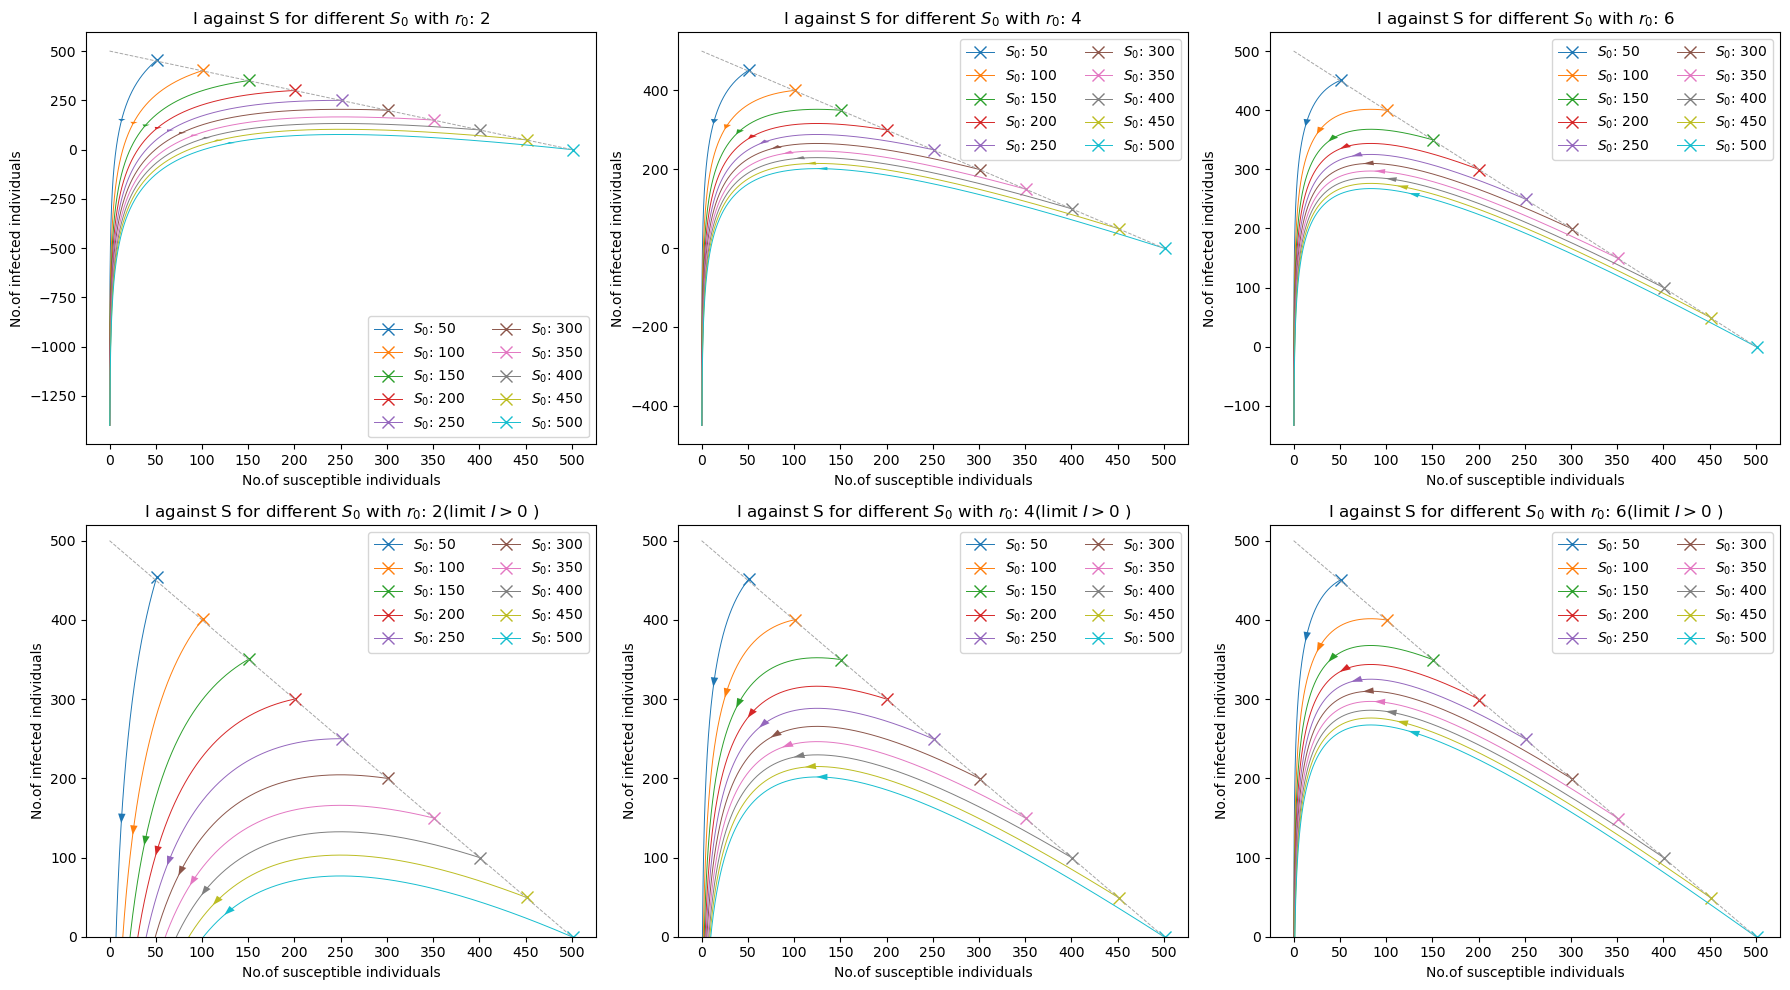

In [36]:
# Color of plots
color_palette = list(mcolors.TABLEAU_COLORS.values()) #10 diff colors
N = 500
S_0_math_set = np.arange(50, N+1, 50)
r_0_math_set = [2, 4, 6]

#Functional form comparison:
I_math = lambda S, r_0, S_0: N - S + (N/r_0)*np.log(S/S_0)

fig, axs = plt.subplots(2,3, figsize = (18,10))

for i in range(len(r_0_math_set)):
    for j in range(len(S_0_math_set)):
        S_math = np.linspace(0, S_0_math_set[j]+1, 2000)
        S_0_label = "$S_0$: " + str(S_0_math_set[j])
        I_math_values = I_math(S_math, r_0_math_set[i], S_0_math_set[j])
        axs[0][i].plot(S_math, I_math_values, label = S_0_label, marker = 'x', markersize = 8, markevery = [0, -1], \
                    linewidth = 0.7)
        axs[0][i].arrow(S_math[500], I_math_values[500], S_math[495] - S_math[500], I_math_values[495] - I_math_values[500],\
                     shape='full', lw = 0, length_includes_head = True, head_width = 8,color = color_palette[j])
        axs[1][i].plot(S_math, I_math_values, label = S_0_label, marker = 'x', markersize = 8, markevery = [0, -1], \
                    linewidth = 0.7)
        axs[1][i].arrow(S_math[500], I_math_values[500], S_math[495] - S_math[500], I_math_values[495] - I_math_values[500],\
                     shape='full', lw = 0, length_includes_head = True, head_width = 8,color = color_palette[j] )

    graph_title_0 = "I against S for different $S_0$ with $r_0$: " + str(r_0_math_set[i])
    axs[0][i].plot([0, N], [N, 0], linestyle = 'dashed', linewidth = 0.7, color = '#a6a6a6')
    axs[0][i].set_title(graph_title_0)
    axs[0][i].set_xlabel("No.of susceptible individuals")
    axs[0][i].set_ylabel("No.of infected individuals")
    axs[0][i].set_xticks(np.arange(0, N+1, 50))
    axs[0][i].legend(ncol = 2)
    
    graph_title_1 = "I against S for different $S_0$ with $r_0$: " + str(r_0_math_set[i]) + '(limit $I > 0$ )'
    axs[1][i].plot([0, N], [N, 0], linestyle = 'dashed', linewidth = 0.7, color = '#a6a6a6')
    axs[1][i].set_title(graph_title_1)
    axs[1][i].set_xlabel("No.of susceptible individuals")
    axs[1][i].set_ylabel("No.of infected individuals")
    axs[1][i].set_xticks(np.arange(0, N+1, 50))
    axs[1][i].set_ylim(0, 520)
    axs[1][i].legend(ncol = 2)
    
plt.tight_layout()
plt.show()

From the results, we see two main difference between that of 3.1:
1. The function allows $I$ to take negative values, which is unphysical since the number of individuals is strictly positive. This can be turn arounded if we limit the function to take $I$ values strictly greater than 0. (see above)
2. The function gives a curve for $S_0$ = 500 instead of a point. This is again unphysical since $S_0$ = 500 imply that the population has no $I_0$ and thus, the virus does not exist in the first place.

Though the mathematical derivation gives some results that are not entirely physical, it is able to provide insights on the effect of $r_0$ on $S_\infty$ for different $S_0$. To begin, we set $I_\infty = 0$ to signify the end of an epidemic and rearrange (5) as follows:

\begin{align}
    S_\infty = N + \frac{N}{r_0} ln(\frac{S_\infty}{S_0}) -- \;(6) \\
\end{align}

Equation (6) is a transcendental equation which cannot be solved analytically to obtain the number of susceptible individuals at $t_\infty$. Due to the natural logarithm on the RHS of (6), we also see that $S_\infty \neq 0$, and $S_\infty \to 0$ is an asymptote. Nevertheless, we can plot the left and right hand side of (6) separately to find $S_\infty$ and observe its values as $r_0$ increases. In the plot, the maximum $S_\infty = S_0$ 

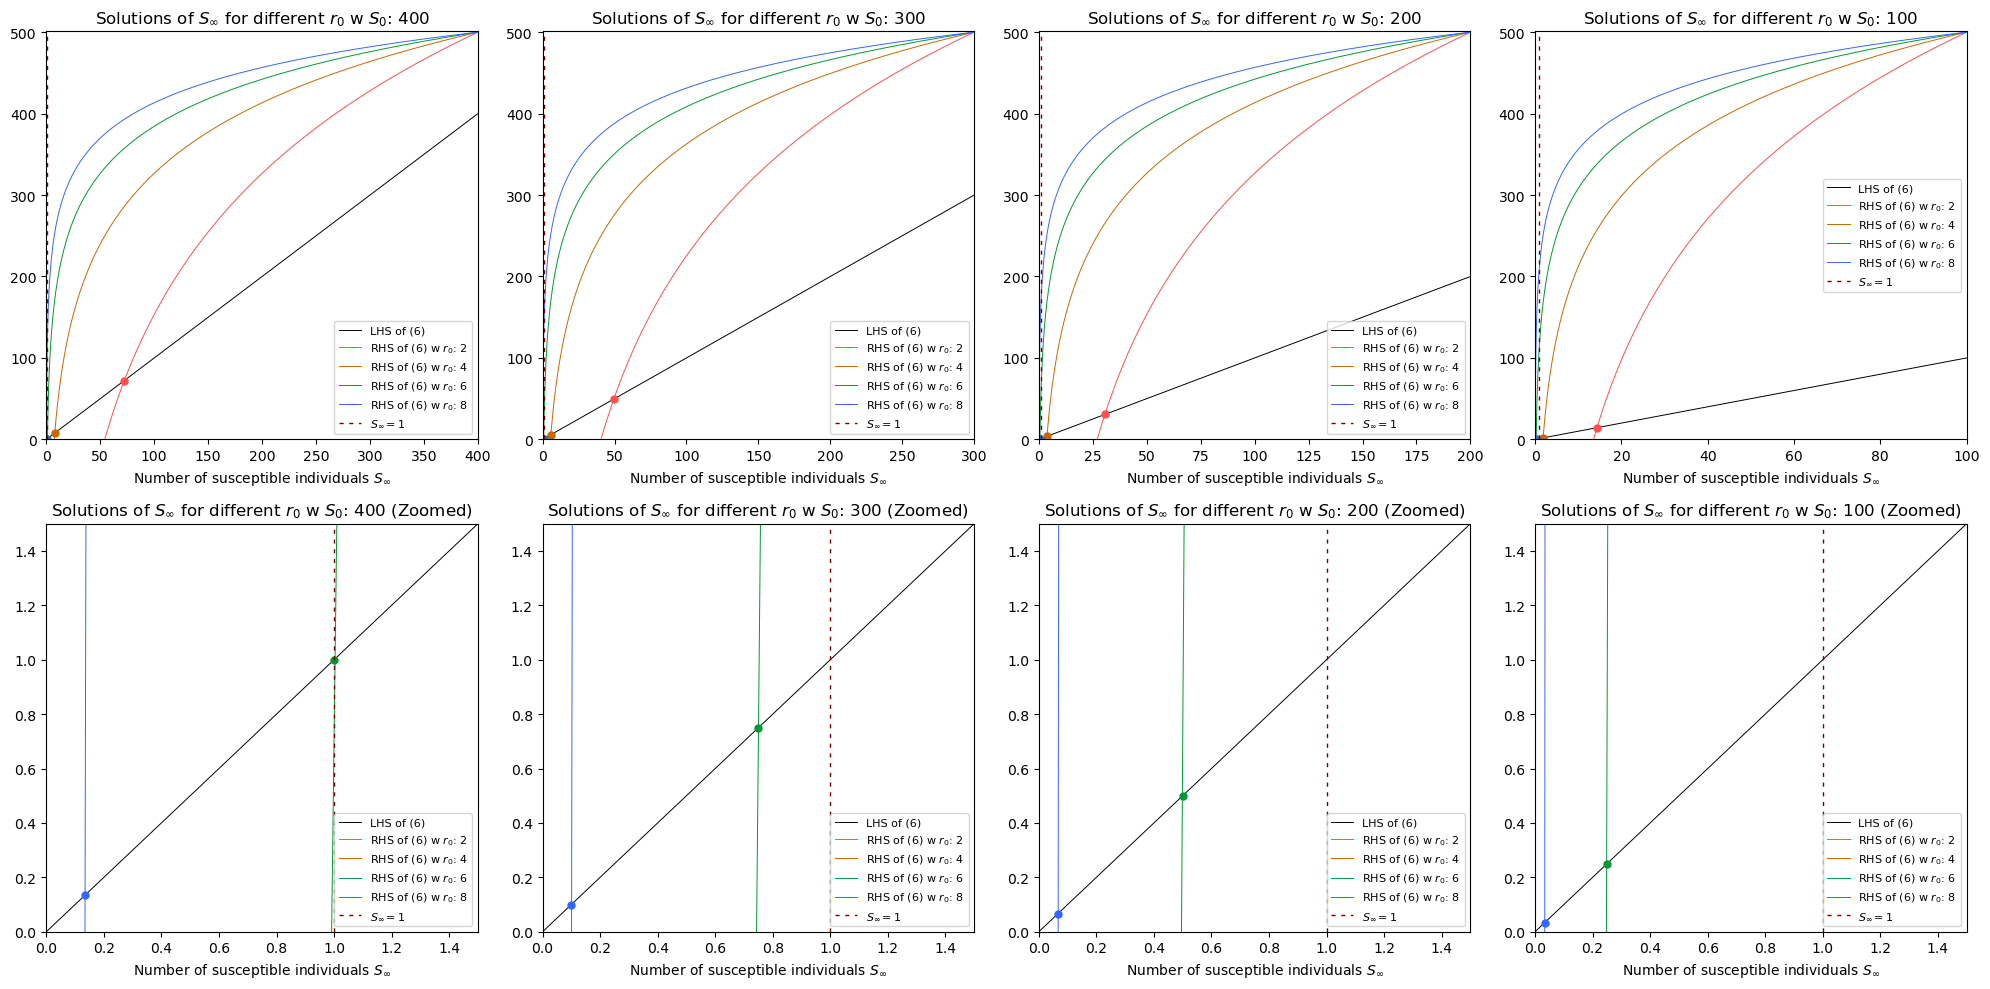

In [7]:
plot_colors = ['#ff5050', '#cc6600', '#009933', '#3366ff'] 

N = 500
r_0_math = [2, 4, 6, 8]
S_0_math = [400, 300, 200, 100]

y_RHS = lambda r_0, S_0, x: N + (N/r_0)*np.log(x/S_0)
S_end = np.linspace(0, N+1, 30000)

fig, axs = plt.subplots(2,len(S_0_math), figsize = (20,10))
for i in range(len(S_0_math)):
    axs[0][i].plot(S_end, S_end, label = 'LHS of (6)',linewidth = 0.7, color = 'k')
    axs[1][i].plot(S_end, S_end, label = 'LHS of (6)',linewidth = 0.7, color = 'k')
    
    for j in range(len(r_0_math)):
        x_values = np.linspace(0, S_0_math[i], 30000)
        y_values = y_RHS(r_0_math[j], S_0_math[i], x_values)
        intersect_index = np.argmin(abs(y_values - x_values))      
        
        RHS_label = "RHS of (6) w $r_0$: " + str(r_0_math[j])
        axs[0][i].plot(x_values, y_values, linewidth = 0.7, label = RHS_label, color = plot_colors[j])
        axs[0][i].plot(x_values[intersect_index], x_values[intersect_index], color = plot_colors[j], \
                    marker = 'o', markersize = 5)
        axs[1][i].plot(x_values, y_values, linewidth = 0.7, label = RHS_label, color = plot_colors[j])
        axs[1][i].plot(x_values[intersect_index], x_values[intersect_index], color = plot_colors[j], \
                    marker = 'o', markersize = 5)
        
    title_0 = "Solutions of $S_\infty$ for different $r_0$ w $S_0$: " + str(S_0_math[i])
    axs[0][i].set_title(title_0)
    axs[0][i].set_ylim(0, N+1)
    axs[0][i].set_xlim(0, S_0_math[i])
    axs[0][i].set_xlabel("Number of susceptible individuals $S_\infty$")  
    axs[0][i].axvline(x = 1, color = '#800000', linestyle = '--', linewidth = 1, dashes=(3, 4), label = "$S_\infty = 1$")
    axs[0][i].legend(fontsize = 8)
    
    title_1 = "Solutions of $S_\infty$ for different $r_0$ w $S_0$: " + str(S_0_math[i]) + " (Zoomed)"
    axs[1][i].set_title(title_1)
    axs[1][i].set_ylim(0, 1.5)
    axs[1][i].set_xlim(0, 1.5)
    axs[1][i].axvline(x = 1, color = '#800000', linestyle = '--', linewidth = 1, dashes=(3, 4), label = "$S_\infty = 1$")
    axs[1][i].set_xlabel("Number of susceptible individuals $S_\infty$")  
    axs[1][i].legend(fontsize = 8)
    
plt.tight_layout()
plt.show()


From the results, we see that $S_\infty$ decreases significantly as $r_0$ increases for a constant $S_0$. This is consistent across all $S_0$ and satisfies the observations in 3.1. Moreover, when zoomed in, we see that for $r_0$ = 6, $S_\infty \to 0$ regardless of $S_0$. The closeness to 0 is even more apparent for a larger $r_0$ = 8 as predicted. With this, we can conclude that the extent of infectiousness at $S_\infty$ is greatly determined by the basic reproduction number $r_0$ of the virus.

#### <u> 4. Conclusion </u>
The ODE method used in the deterministic model gives us a wonderful mean-field understanding of the dynamics of an epidemic. Using $r_0$, we are able to determine the extent of epidemic spreading for different initial conditions $S_0$ and $I_0$, and estimate the final outcome. <br>

However, the second assumption in this model is far from realistic. In truth, everyone has their own social circle with each having different types of interactions. Hence, we shall relax this assumption in the next chapter and introduce social networks (complex network) to model interactions between individuals from different compartments. We will also introduce varying recovery times in the next chapter to better represent actualities in the real world.